In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\FE1_NYPD_Complaint_Data_Historic.csv"
df_Crime = pd.read_csv(crime_file)

C:\Users\BGaither\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_Crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [4]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

#Create function to apply new bin labels for crimes types
def crime_apply(string):
    
    for word in string.split():
        if word in personal_list:
            return "Personal Crime"
        elif word in property_list:
            return "Property Crime"
        elif word in statutory_list:
            return "Statutory Crime"
    else:
        return "Other"
    
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other
#Each bucket was derived using intel from https://www.justia.com/criminal/offenses/

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Other - everything else

In [5]:
#Display Crime Counts with the new feature

df_Crime =df_Crime[df_Crime['OFNS_DESC'].notna()]

df_Crime['OFNS_DESC'] = df_Crime.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
df_Crime['OFNS_DESC_TYPE'] = df_Crime.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
df_Crime['OFNS_DESC_TYPE'].value_counts()

Property Crime     525885
Personal Crime     333129
Statutory Crime    185102
Other                1579
Name: OFNS_DESC_TYPE, dtype: int64

In [6]:
df_Crime.groupby('OFNS_DESC_TYPE').mean()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
OFNS_DESC_TYPE,,,,,,,,,,,,,,,
Other,5.556578e+08,209.253325,794.367954,63.425586,1.005291e+06,207619.527296,40.736503,-73.924049,2.636596,51.364788,15.261558,2014.355288,59.102119,6.456005,6.264611
Personal Crime,5.494919e+08,387.505321,373.430983,65.790838,1.006201e+06,206912.183827,40.734557,-73.920766,1.618053,13.719909,15.574720,2014.356525,58.581880,6.533524,6.204836
Property Crime,5.498449e+08,241.408795,358.918047,62.561603,1.004044e+06,206122.539943,40.732395,-73.928551,4.714625,15.594093,15.558830,2014.341322,57.952010,6.376727,6.157531
Statutory Crime,5.495780e+08,282.350002,613.177151,63.882929,1.005553e+06,208372.997645,40.738569,-73.923095,2.180369,7.510206,15.326769,2014.342367,59.562885,6.484604,6.307830


In [7]:
df_Crime.shape

(1045695, 39)

In [8]:
#grab the features we want to start working with in a classifier
df_Crime = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y','OFNS_DESC_TYPE']]

In [9]:
len(df_Crime) - df_Crime.count()

JURIS_DESC                0
BORO_NM                   0
ADDR_PCT_CD               1
LOC_OF_OCCUR_DESC    216633
PREM_TYP_DESC          4676
Day_Name                 65
Duration             205484
Duration_to_PD           65
Month                    65
Day                      65
Year                     65
Duration_lbl         256976
Season                   65
Daytime               49781
GeoCell               32363
GeoCell_X             32329
GeoCell_Y             32362
OFNS_DESC_TYPE            0
dtype: int64

In [10]:
df_Crime = df_Crime.dropna()

In [11]:
df_Crime.shape

(587637, 18)

In [12]:
#counts after dropping na's
df_Crime['OFNS_DESC_TYPE'].value_counts()

Property Crime     319442
Personal Crime     181736
Statutory Crime     85817
Other                 642
Name: OFNS_DESC_TYPE, dtype: int64

In [15]:
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['OFNS_DESC_TYPE']]

Text(0, 0.5, 'Frequency of Offense')

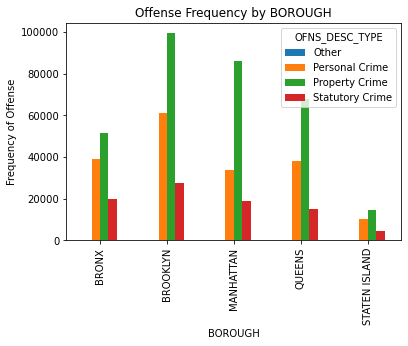

In [16]:
%matplotlib inline
pd.crosstab(X.BORO_NM,y.OFNS_DESC_TYPE).plot(kind='bar')
plt.title('Offense Frequency by BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('Frequency of Offense')
#plt.savefig('put_file_name_here')

Text(0, 0.5, 'Frequency of Offense')

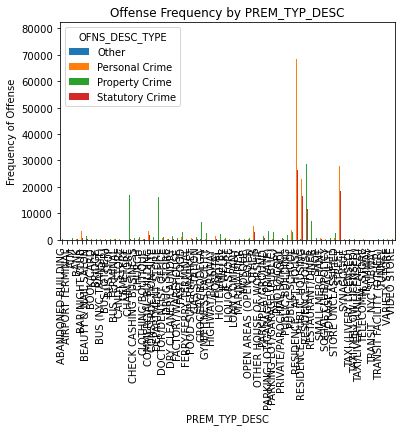

In [17]:
%matplotlib inline
pd.crosstab(X.PREM_TYP_DESC,y.OFNS_DESC_TYPE).plot(kind='bar')
plt.title('Offense Frequency by PREM_TYP_DESC')
plt.xlabel('PREM_TYP_DESC')
plt.ylabel('Frequency of Offense')
#plt.savefig('put_file_name_here')

Text(0, 0.5, 'Frequency of Offense')

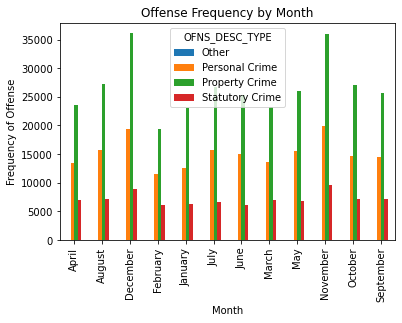

In [18]:
%matplotlib inline
pd.crosstab(X.Month,y.OFNS_DESC_TYPE).plot(kind='bar')
plt.title('Offense Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Offense')
#plt.savefig('put_file_name_here')

Text(0, 0.5, 'Frequency of Offense')

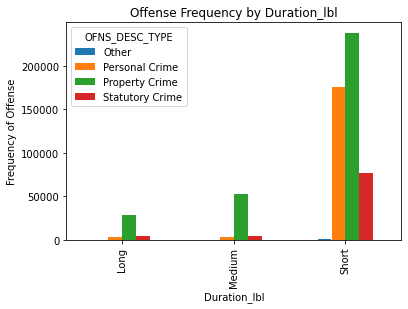

In [19]:
%matplotlib inline
pd.crosstab(X.Duration_lbl,y.OFNS_DESC_TYPE).plot(kind='bar')
plt.title('Offense Frequency by Duration_lbl')
plt.xlabel('Duration_lbl')
plt.ylabel('Frequency of Offense')
#plt.savefig('put_file_name_here')

In [20]:
X.shape

(587637, 17)

In [21]:
X.dtypes

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
dtype: object

In [ ]:
#dummy variables for categoricals
cat_vars=['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1

data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
#keep only the non-categoricals and the new dummy variables
X = X[to_keep]
X.columns.values

In [ ]:
X.head(5)

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['OFNS_DESC_TYPE']]

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_to_scale = ['Duration','Duration_to_PD']
columns_no_change = ['Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder and scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False)

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X[columns_to_scale])
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together
X_np = np.concatenate([scaled_columns,encoded_columns,existing_cols],axis=1)


In [47]:
#convert the numpy array back to a pandas dataframe
df1 = pd.DataFrame(X_np)
df1

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587632,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
587633,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
587634,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
587635,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


In [52]:
#get the column names back to the dataframe
feature_names = ohe.get_feature_names().tolist()
#df = pd.DataFrame(feature_names)
#df = df.T
col_names = columns_to_scale+feature_names+columns_no_change
col_names
df1.columns = col_names
X = df1
X

,Duration,Duration_to_PD,x0_AMTRACK,x0_DEPT OF CORRECTIONS,x0_HEALTH & HOSP CORP,x0_LONG ISLAND RAILRD,x0_METRO NORTH,x0_N.Y. HOUSING POLICE,x0_N.Y. POLICE DEPT,x0_N.Y. STATE PARKS,...,x9_Early Morning,x9_Evening,x9_Late Night,x9_Morning,x9_Night,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
0,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
1,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,46.0,6.0,5.0
2,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,87.0,7.0,9.0
3,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,77.0,7.0,8.0
4,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,31.0,2015.0,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587632,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,27.0,7.0,3.0
587633,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,65.0,5.0,7.0
587634,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,77.0,7.0,8.0
587635,-0.490925,-0.044473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2013.0,37.0,7.0,4.0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

print('Cross Validation Results:'.format(cv_results.mean()))

Cross Validation Results:


In [62]:
cv_results

array([0.65278339, 0.65371934, 0.65429368, 0.65044351, 0.65295356,
       0.65110293, 0.64950756, 0.64995427, 0.65429368, 0.65056371])

In [60]:
clf.fit(X_train,y_train)
clf_predictions = clf.predict(X_test)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Duration, Score: 0.05690
Duration_to_PD, Score: 0.04668
x0_AMTRACK, Score: 0.00001
x0_DEPT OF CORRECTIONS, Score: 0.00099
x0_HEALTH & HOSP CORP, Score: 0.00012
x0_LONG ISLAND RAILRD, Score: 0.00001
x0_METRO NORTH, Score: 0.00002
x0_N.Y. HOUSING POLICE, Score: 0.00619
x0_N.Y. POLICE DEPT, Score: 0.00664
x0_N.Y. STATE PARKS, Score: 0.00001
x0_N.Y. STATE POLICE, Score: 0.00013
x0_N.Y. TRANSIT POLICE, Score: 0.00000
x0_NEW YORK CITY SHERIFF OFFICE, Score: 0.00002
x0_NYC PARKS, Score: 0.00001
x0_NYS DEPT TAX AND FINANCE, Score: 0.00000
x0_OTHER, Score: 0.00060
x0_POLICE DEPT NYC, Score: 0.00004
x0_PORT AUTHORITY, Score: 0.00018
x0_STATN IS RAPID TRANS, Score: 0.00000
x0_TRI-BORO BRDG TUNNL, Score: 0.00012
x0_U.S. PARK POLICE, Score: 0.00000
x1_BRONX, Score: 0.00223
x1_BROOKLYN, Score: 0.00325
x1_MANHATTAN, Score: 0.00518
x1_QUEENS, Score: 0.00298
x1_STATEN ISLAND, Score: 0.00126
x2_FRONT OF, Score: 0.00767
x2_INSIDE, Score: 0.01088
x2_OPPOSITE OF, Score: 0.00301
x2_REAR OF, Score: 0.00325
x

<AxesSubplot:>

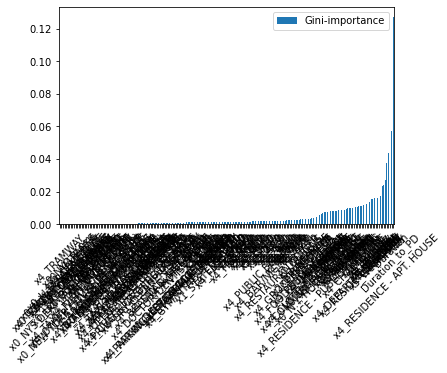

In [76]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [75]:
df_top_features = importances[importances['Gini-importance']>.0045]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gini-importance,feature
Day,0.127023,Day
Duration,0.056904,Duration
Duration_to_PD,0.046680,Duration_to_PD
Year,0.043560,Year
GeoCell,0.037697,GeoCell
x4_RESIDENCE - APT. HOUSE,0.027263,x4_RESIDENCE - APT. HOUSE
GeoCell_Y,0.023828,GeoCell_Y
GeoCell_X,0.023619,GeoCell_X
x7_Short,0.017080,x7_Short
x5_Friday,0.016600,x5_Friday


In [77]:
top_features

['Duration',
 'Duration_to_PD',
 'x0_N.Y. HOUSING POLICE',
 'x0_N.Y. POLICE DEPT',
 'x1_MANHATTAN',
 'x2_FRONT OF',
 'x2_INSIDE',
 'x4_CHAIN STORE',
 'x4_DEPARTMENT STORE',
 'x4_DRUG STORE',
 'x4_RESIDENCE - APT. HOUSE',
 'x4_RESIDENCE - PUBLIC HOUSING',
 'x4_RESIDENCE-HOUSE',
 'x4_STREET',
 'x5_Friday',
 'x5_Monday',
 'x5_Saturday',
 'x5_Sunday',
 'x5_Thursday',
 'x5_Tuesday',
 'x5_Wednesday',
 'x6_April',
 'x6_August',
 'x6_December',
 'x6_February',
 'x6_January',
 'x6_July',
 'x6_June',
 'x6_March',
 'x6_May',
 'x6_November',
 'x6_October',
 'x6_September',
 'x7_Medium',
 'x7_Short',
 'x8_Fall',
 'x8_Spring',
 'x8_Summer',
 'x8_Winter',
 'x9_Day',
 'x9_Early Morning',
 'x9_Evening',
 'x9_Late Night',
 'x9_Morning',
 'x9_Night',
 'Day',
 'Year',
 'GeoCell',
 'GeoCell_X',
 'GeoCell_Y']

In [89]:
y_enc = y
y_enc['OFNS_DESC_TYPE'] = y_enc['OFNS_DESC_TYPE'].astype('category')
y_enc['OFNS_DESC_TYPE_CAT'] = y_enc['OFNS_DESC_TYPE'].cat.codes
del y_enc['OFNS_DESC_TYPE']
y_enc.head(5)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OFNS_DESC_TYPE_CAT
4,1
5,1
8,1
10,2
11,2


In [92]:
#now use only top features
X = X[top_features]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size=0.2,random_state=0)

#saga can handle multinomial loss, L2 and L1 penalty
#multinomial the loss is minimized
clf_LR = LogisticRegression(solver='saga', multi_class='multinomial',random_state=0, max_iter=10000)

clf_LR.fit(X_train,y_train)

predictions = clf_LR.predict(X_test)

In [94]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.53      0.59      0.56     36403
           2       0.69      0.83      0.75     63739
           3       0.47      0.03      0.05     17263

    accuracy                           0.64    117528
   macro avg       0.42      0.36      0.34    117528
weighted avg       0.61      0.64      0.59    117528



C:\Users\BGaither\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X_np, y.values.ravel(), test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('rf',RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
y

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(metrics.classification_report(Y_test,predictions))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()